<a href="https://colab.research.google.com/github/solobala/FEML23/blob/master/FEML23_DZ4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Цель: применить на практике методы по оценке качества данных.

Описание задания:
В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.


[Импорт Библиотек](https://colab.research.google.com/drive/1HsWNJoM2G1vOLHnqhyTYKLwuPkUcQEVP#scrollTo=7WBrTMwAaA9v)

[1. Получите и загрузите данные](https://colab.research.google.com/drive/1HsWNJoM2G1vOLHnqhyTYKLwuPkUcQEVP#scrollTo=S6RUEE5peQpm)

[2. Удалите все пропущенные значения и категориальные переменные](https://colab.research.google.com/drive/1HsWNJoM2G1vOLHnqhyTYKLwuPkUcQEVP#scrollTo=kx7TlUbgea6U/)

[3. Обучите модель. Выберете и посчитайте метрику качества.](https://colab.research.google.com/drive/1HsWNJoM2G1vOLHnqhyTYKLwuPkUcQEVP#scrollTo=jcHDLVTYgCfI)

[Снова загрузите полные данные.](https://colab.research.google.com/drive/1HsWNJoM2G1vOLHnqhyTYKLwuPkUcQEVP#scrollTo=-DdVvUu17lfT/)

[4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.](https://colab.research.google.com/drive/1HsWNJoM2G1vOLHnqhyTYKLwuPkUcQEVP#scrollTo=Xila8HWc7oWy)

[5. Проверьте данные на наличие пропущенных значений.](https://colab.research.google.com/drive/1HsWNJoM2G1vOLHnqhyTYKLwuPkUcQEVP#scrollTo=jdCiYrb47vrX)

*   [a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.](https://colab.research.google.com/drive/1HsWNJoM2G1vOLHnqhyTYKLwuPkUcQEVP#scrollTo=Wl1G1zq39G93)
*   [b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом.](https://colab.research.google.com/drive/1HsWNJoM2G1vOLHnqhyTYKLwuPkUcQEVP#scrollTo=L3V2Wsz99RRR)

[6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder.](https:/https://colab.research.google.com/drive/1HsWNJoM2G1vOLHnqhyTYKLwuPkUcQEVP#scrollTo=XxMhpqkbRSnK&line=1&uniqifier=1)

[7. Проверьте данные на наличие выбросов.](https://colab.research.google.com/drive/1HsWNJoM2G1vOLHnqhyTYKLwuPkUcQEVP#scrollTo=lcb-MkICRXIU)

[8. Постройте 1-2 графика на выбор.](https://colab.research.google.com/drive/1HsWNJoM2G1vOLHnqhyTYKLwuPkUcQEVP#scrollTo=MFJ8NDJJRikG&line=1&uniqifier=1)

[9. Попробуйте математически преобразовать признак Age](https://colab.research.google.com/drive/1HsWNJoM2G1vOLHnqhyTYKLwuPkUcQEVP#scrollTo=9gGJlRM5RpD5)

[10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.](https://colab.research.google.com/drive/1HsWNJoM2G1vOLHnqhyTYKLwuPkUcQEVP#scrollTo=b4lxD-81SDO_)

[11. Сформулируйте выводы по проделанной работе.](https://colab.research.google.com/drive/1HsWNJoM2G1vOLHnqhyTYKLwuPkUcQEVP#scrollTo=8DB_xHZTSQ17&line=3&uniqifier=1)


*   [a) Кратко опишите какие преобразования были сделаны и почему.](https://colab.research.google.com/drive/1HsWNJoM2G1vOLHnqhyTYKLwuPkUcQEVP#scrollTo=8DB_xHZTSQ17&line=3&uniqifier=1)
*   [b) Сравните метрики моделей из п. 2 и п. 10.](https://colab.research.google.com/drive/1HsWNJoM2G1vOLHnqhyTYKLwuPkUcQEVP#scrollTo=FSqjlWCCfQd_&line=24&uniqifier=1)




### Импорт библиотек

In [1]:
from zipfile import ZipFile # Загрузка данных
import fnmatch
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
      print(os.path.join(dirname, filename))

In [2]:
!pip install -q kaggle # Делаем 1 раз

In [3]:
# Это напоминалка - приглашение загрузить в сессионное хранилище свой kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"marinabalakina","key":"0763a280a2e52ea690b44499c8ab213e"}'}

In [4]:
! mkdir ~/.kaggle # Создаем каталог .caggle  1 раз, для того, чтобы сюда положить ключ kaggle.json, который получаем на Kaggle при регистрации

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! cp kaggle.json ~/.kaggle/  # кладем туда ключ

In [5]:
! chmod 600 /root/.kaggle/kaggle.json # засекречиваем. К сожалению, это все только на время сеанса

In [6]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass   

In [7]:
from sklearn.linear_model import LinearRegression
def get_value(X, column, mode='mean', value=0, columns_for_reg=None): 
    if mode == 'value':
        X.loc[X[X[column].isna()].index ,column] = value # заполнение значением

    elif mode == 'median':
        X.loc[X[X[column].isna()].index ,column] = X[column].median()    # заполнение медианой
    
    elif mode == 'mode':
        X.loc[X[X[column].isna()].index, column] = X[column].mode()   # заполнение модой
    
    elif mode == 'indicator': # метод индикатора (принимает значение 1 при наличие пропуска и 0 в остальных случаях)
        X['ind_'+str(column)] = 0
        X.loc[X[X[column].isna()].index, 'ind_'+str(column)] = 1
        X.loc[X[X[column].isna()].index, column] = 0     
    
    elif mode == 'linreg':   # линейная регрессия
        if columns_for_reg is None:
            cols = list(X.select_dtypes([np.number]).columns) 
            cols.remove(column)
        else:
            cols = columns_for_reg
        X_tmp = X.dropna()  
        m = LinearRegression().fit(X_tmp[cols], X_tmp[column])
        X.loc[X[X[column].isna()].index, column] = m.predict(X[X[column].isna()][cols])
    
    else:
        X.loc[X[X[column].isna()].index, column] = X[column].mean()  # по умолчанию среднее значение
    
    return X.head()

## 1. Получите и загрузите данные

In [8]:
!kaggle datasets list -s 'titanic' # Сюда  - любое ключевое слово для поиска датасета

ref                                                 title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
heptapod/titanic                                    Titanic                                         11KB  2017-05-16 08:14:22          53502        983  0.7058824        
brendan45774/test-file                              Titanic dataset                                 11KB  2021-12-02 16:11:42          53719        530  1.0              
azeembootwala/titanic                               Titanic                                         12KB  2017-06-05 12:14:37          16115        162  0.8235294        
rahulsah06/titanic                                  Titanic                                         34KB  2019-09-16 14:43:23           5565     

In [9]:
!kaggle datasets download -d hesh97/titanicdataset-traincsv

titanicdataset-traincsv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
with ZipFile('/content/titanicdataset-traincsv.zip', 'r') as zip_file:  
    print(zip_file.infolist())
    for item in zip_file.infolist():
      if fnmatch.fnmatch(item.filename, '*.csv'):

        zip_file.extract(item.filename)
        os.rename(item.filename,"train.csv")

[<ZipInfo filename='train.csv' compress_type=deflate file_size=61194 compress_size=22388>]


In [11]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data description:

Survival - Survival (0 = No; 1 = Yes). 

Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name - Name

Sex - Sex

Age - Age

Sibsp - Number of Siblings/Spouses Aboard

Parch - Number of Parents/Children Aboard

Ticket - Ticket Number

Fare - Passenger Fare

Cabin - Cabin

Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)




##2. Удалите все пропущенные значения и категориальные переменные

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Явные пропуски данных  в столбцах Age, Cabin, Embarked

In [14]:
# Категориальные features - определяем по типу object. Вместе с target их 9
cat_features = data.select_dtypes("object").columns
print(*cat_features, sep=", ")

Name, Sex, Ticket, Cabin, Embarked


In [15]:
data.drop(columns=cat_features, inplace=True) # удалили категориальные переменные

In [16]:
data.dropna(inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        714 non-null    int64  
 5   Parch        714 non-null    int64  
 6   Fare         714 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


## 3. Обучите модель. Выберете и посчитайте метрику качества.

In [18]:
y = data['Survived']
X = data.drop(columns = ['Survived'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, multi_class='multinomial',
                                        class_weight={0: pd.DataFrame(y_train).value_counts(normalize=True)[0],
                                                      1: pd.DataFrame(y_train).value_counts(normalize=True)[1]})
)

In [20]:
lr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight={0: 0.6042031523642732,
                                                  1: 0.3957968476357268},
                                    max_iter=1000,
                                    multi_class='multinomial'))])

In [21]:
predictions = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)
print(f'accuracy={lr.score(X_test, y_test)}, precision={precision_score(y_test, predictions)}, recall={recall_score(y_test, predictions)}, balanced_accuracy_score = {balanced_accuracy_score(y_test, predictions)}')

accuracy=0.6853146853146853, precision=0.7878787878787878, recall=0.40625, balanced_accuracy_score = 0.6588212025316456


## Снова загрузите полные данные.

In [22]:
df = pd.read_csv('train.csv')

## 4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

Для построения модели не нужны признаки Name и PassengerID . 
Они индивидуальны для каждого пассажира и вряд ли влияют на Survived . 
Однако PassengerID удобен для идентификации пассажира, а в Name cодержится дополнительная информаwия - социальный статус пассажира, которая может быть использована.
Поэтому все не нужные напрямую для построения модели признаки будут удалены непосредственно перед фрмированием X и y

In [23]:
df['Ticket'].nunique()  # 681 уникальное значение из 891 записей, т.е 210 повторений номера билета

681

Видимо, это были групповые или семейныe билеты. Значит, по этому признаку можно объединять пассажиров  в группы 

In [24]:
df['Group']= df['Ticket'].apply(lambda x: len(df[df['Ticket']==x]) if x!='LINE' else 1) # В столбец Group записываем число билетов с одним и тем же номером

In [25]:
df['Group'].unique() #Кол-во пассажиров в группе при покупке групповых билетов

array([1, 2, 4, 3, 7, 5, 6])

## 5.  Проверьте данные на наличие пропущенных значений.



In [26]:
# На наличие nan уже проверяли в начале ноутбука и выявили пустые значенимя в столбwах Age, Cabin, Embarked. Сейчас проверим, нет ли пропусков, обозначенных "?" 
flag=True
for column in df.columns:
  if('?')  in list(df[column].value_counts()):
    print(column)
    flag = False
if flag:
    print('пропусков "?" нет')

пропусков "?" нет


### a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

In [27]:
print(f"% данных, удаляемый при удалении пропусков: {len(df[pd.isnull(df['Age']) | pd.isnull(df['Cabin']) | pd.isnull(df['Embarked'])])/len(df)*100}")

% данных, удаляемый при удалении пропусков: 79.46127946127946


Это слишком много, поэтому нужно заполнять пропуски

### b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. 

Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

####"Embarked", признак, указывающий на порт отправки. Пропущено всего 2 значения.

In [28]:
df[pd.isnull(df['Embarked'])] # Это 2 женщины, 1 класс, общая каюта. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Group
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,2
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,2


Заполним наиболее часто встречающимся значением ( это и будет S)

In [29]:
df.loc[pd.isnull(df['Embarked']),'Embarked']='S'

#### "Age" - возраст пассажира

In [30]:
df[pd.isnull(df['Age'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Group
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,7
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,1
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,1


Пропущено 177 значений. Будем заполнять с учетом возрастной категории  пассажира. Для понимания возрастной категории и социального положения добавим новый признак -Mrs, Mr, Miss , Master, значения которого можно извлечь из Name 

In [31]:
def cat(x):
  dic = dict()
  dic['Master.'] = ['Master']
  dic['Mr.'] = ['Mr.', 'Dr.', 'Rev.', 'Col.', 'Major.', 'Jonkheer', 'Sir.', 'Don.', 'Capt.']
  dic['Mrs.'] = ['Mrs', 'Mme', 'Lady', 'Countess']
  dic['Miss.'] = ['Miss.', 'Ms.', 'Mlle']
  for key, values in dic.items():
    for value in values:
      if value in x:
        return key
  return 'Other'

In [32]:
df['cat']=df['Name'].apply(cat)

In [33]:
df['cat'].value_counts()

Mr.        538
Miss.      182
Mrs.       131
Master.     40
Name: cat, dtype: int64

При заполнении пропусков с помощью линейной регессии у групы пассажиров из 8 человек, относящихся к одной семье, получились отрицательные возрасты. Чтобы это исправить, заполним для членов этой семьи возаст следующим образом:
-для мужчин('Mr.') - с помощью медианного значения возраста мужчин-пассажиров 3 класса
-для девушек и девочек('Miss.') - с помошью медианного значения возрастов девушек-пассажирок 3 класса
-для мальчиков ('Master.')_ аналогично 

In [34]:
mean_age = np.median(df.loc[(df['Pclass']==3) & (df['cat']=='Mr.') & (~pd.isnull(df['Age'])), 'Age']) # Средний возраст мужчин в 3 классе
df.loc[[201,324,846], 'Age'] = mean_age 

In [35]:
mean_age = np.median(df.loc[(df['Pclass']==3) & (df['cat']=='Miss.') & (~pd.isnull(df['Age'])), 'Age']) # Средний возраст незамужних женщин в 3 классе
df.loc[[180,792,863], 'Age'] = mean_age 

In [36]:
mean_age = np.median(df.loc[(df['Pclass']==3) & (df['cat']=='Master.') & (~pd.isnull(df['Age'])), 'Age']) # Средний возраст мальчиков в 3 классе
df.loc[[159], 'Age'] = mean_age



In [37]:
get_value(X=df,
          column='Age',
          mode='linreg',
          columns_for_reg=['Survived','Pclass', 'Parch', 'SibSp'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Group,cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr.


In [38]:
df[df['Age']<0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Group,cat


В колонке cabin слишком много пропусков, причем основные пропуски - у пасссажиров 2 и 3 классов. Можно достать из этой колонки палубу (Deck)

In [39]:
print(f"Соотношение пропусков по классам кают: 1 - {df[(df['Pclass']==1) & (pd.isnull(df['Cabin']))].shape[0]/df.shape[0] * 100}, 2 - {df[(df['Pclass']==2) & (pd.isnull(df['Cabin']))].shape[0]/df.shape[0] * 100}, 3 - {df[(df['Pclass']==3) & (pd.isnull(df['Cabin']))].shape[0]/df.shape[0] * 100}")

Соотношение пропусков по классам кают: 1 - 4.489337822671156, 2 - 18.855218855218855, 3 - 53.759820426487096


In [40]:
df['Deck']=df['Cabin'].apply(lambda x: x[0] if not pd.isna(x) else 'other')

In [41]:
df.loc[(df['Pclass']==1),'Deck'].value_counts()

C        59
B        47
other    40
D        29
E        25
A        15
T         1
Name: Deck, dtype: int64

In [42]:
df.loc[(df['Pclass']==2),'Deck'].value_counts()

other    168
F          8
D          4
E          4
Name: Deck, dtype: int64

In [43]:
df.loc[(df['Pclass']==3),'Deck'].value_counts()

other    479
F          5
G          4
E          3
Name: Deck, dtype: int64

In [44]:
df.drop(columns=['Cabin'], inplace=True)

## 6. Проверьте данные на наличие выбросов.
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

#### Признак "Fare" пропусков нет, но данные содержат выбросы

среднеквадратичное отклонение значително превышает среднее значение. Очевидно, что стоимость проезда по классам разная, и бесполезно работать с Fare по всему датасету, нужно разбивать датасет по классам

In [45]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Group
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.215183,0.523008,0.381594,32.204208,1.774411
std,257.353842,0.486592,0.836071,13.610086,1.102743,0.806057,49.693429,1.354002
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,27.205539,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,36.880481,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,7.000000


In [46]:
df[df['Pclass']==1].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Group
count,216.000000,216.000000,216.0,216.000000,216.000000,216.000000,216.000000,216.000000
mean,461.597222,0.629630,1.0,38.770557,0.416667,0.356481,84.154687,1.861111
std,246.737616,0.484026,0.0,13.916610,0.611898,0.693997,78.380373,0.964084
min,2.000000,0.000000,1.0,0.920000,0.000000,0.000000,0.000000,1.000000
25%,270.750000,0.000000,1.0,29.000000,0.000000,0.000000,30.923950,1.000000
50%,472.000000,1.000000,1.0,38.503573,0.000000,0.000000,60.287500,2.000000
75%,670.500000,1.000000,1.0,47.250000,1.000000,0.000000,93.500000,2.000000
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,512.329200,4.000000


Значения стоимости проезда 5 фунтов  вызывают сомнение. Классифицируем как выбросы

In [47]:
df[df['Fare']==5.0] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Group,cat,Deck
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,S,1,Mr.,B


In [48]:
df.drop(index=872, inplace=True)

In [49]:
df[df['Fare']==0.0] # Все бесплатники - одиночки, мужчины, отплывали из порта S
# т.к указаны разные классы, видимо, просто пропуски заменили на 0. Выполним замену на наиболее часто встречающееся значение, причем  посчитаем в зависимости от класа проезда

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Group,cat,Deck
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,S,1,Mr.,other
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,S,1,Mr.,B
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,S,1,Mr.,other
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,36.880481,0,0,239853,0.0,S,3,Mr.,other
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,S,1,Mr.,other
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,36.880481,0,0,239853,0.0,S,3,Mr.,other
466,467,0,2,"Campbell, Mr. William",male,36.880481,0,0,239853,0.0,S,3,Mr.,other
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,36.880481,0,0,239854,0.0,S,1,Mr.,other
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,S,1,Mr.,other
633,634,0,1,"Parr, Mr. William Henry Marsh",male,46.555424,0,0,112052,0.0,S,1,Mr.,other


In [50]:
attrib, counts = np.unique(df.loc[((df['Pclass']==1) &(df['SibSp']==0) & (df['Parch']==0)), 'Fare'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df.loc[(df['Pclass']==1) & (df['Fare']==0.0), 'Fare'] = most_freq_attrib 
attrib, counts = np.unique(df.loc[((df['Pclass']==2) &(df['SibSp']==0) & (df['Parch']==0)), 'Fare'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df.loc[(df['Pclass']==2)& (df['Fare']==0.0), 'Fare'] = most_freq_attrib 
attrib, counts = np.unique(df.loc[((df['Pclass']==3) &(df['SibSp']==0) & (df['Parch']==0)), 'Fare'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df.loc[(df['Pclass']==3) & (df['Fare']==0.0), 'Fare'] = most_freq_attrib 

In [51]:
df[df['Pclass']==2].describe() # С тарифом Fare по-прежнему неясно, вряд ли его максимальное значение во 2 классе выше, чем в 1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Group
count,184.000000,184.000000,184.0,184.000000,184.000000,184.000000,184.000000,184.000000
mean,445.956522,0.472826,2.0,30.121239,0.402174,0.380435,21.086096,1.630435
std,250.852161,0.500623,0.0,13.641376,0.601633,0.690963,12.952730,0.907978
min,10.000000,0.000000,2.0,0.670000,0.000000,0.000000,10.500000,1.000000
25%,234.500000,0.000000,2.0,23.000000,0.000000,0.000000,13.000000,1.000000
50%,435.500000,0.000000,2.0,29.500000,0.000000,0.000000,14.250000,1.000000
75%,668.000000,1.000000,2.0,36.880481,1.000000,1.000000,26.000000,2.000000
max,887.000000,1.000000,2.0,70.000000,3.000000,3.000000,73.500000,5.000000


Максимальное значение 73.5 для 2 класса великовато

In [52]:
df[df['Pclass']==3].describe() # Та же проблема, что и во 2 классе

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Group
count,491.000000,491.000000,491.0,491.000000,491.000000,491.000000,491.000000,491.000000
mean,439.154786,0.242363,3.0,24.672056,0.615071,0.393075,13.741131,1.790224
std,264.441453,0.428949,0.0,10.987750,1.374883,0.888861,11.723991,1.613333
min,1.000000,0.000000,3.0,0.420000,0.000000,0.000000,4.012500,1.000000
25%,200.000000,0.000000,3.0,19.000000,0.000000,0.000000,7.750000,1.000000
50%,432.000000,0.000000,3.0,25.000000,0.000000,0.000000,8.050000,1.000000
75%,666.500000,0.000000,3.0,29.000000,1.000000,0.000000,15.500000,2.000000
max,891.000000,1.000000,3.0,74.000000,8.000000,6.000000,69.550000,7.000000


Максимальное значение 69.55 для 3 класса великовато

Даже с учетом разбиения по классам статистики Fare выглядят странно, и это наводит на мысль о том, что Fare - это не тариф на 1 человека, а стоимость группового билета.  Введем новую колонку Person_fare - со стоимостью проезда на 1 пассажира за одну каюту

In [53]:
df['Person_fare']=df.apply(lambda row: row.Fare/(row.Group) if (row.Group)>0  else row.Fare, axis=1) 

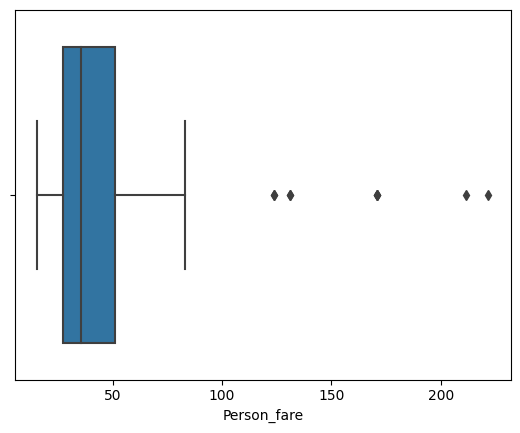

In [54]:
get_boxplot(df[df['Pclass']==1], columns=['Person_fare'])

In [55]:
df.loc[df['Person_fare']>=120] 
df.drop(index=[118, 258, 299, 311, 377, 527, 679, 737, 742], inplace=True) # отобрала вручную

In [56]:
df[df['Pclass']==1].describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Group,Person_fare
count,206.000000,206.000000,206.0,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,460.072816,0.631068,1.0,39.072257,0.417476,0.330097,74.345166,1.854369,39.323887
std,246.910233,0.483691,0.0,14.014052,0.601206,0.675543,52.909613,0.971875,15.256741
min,2.000000,0.000000,1.0,0.920000,0.000000,0.000000,25.587500,1.000000,15.500000
25%,270.250000,0.000000,1.0,30.000000,0.000000,0.000000,30.695800,1.000000,26.550000
50%,472.000000,1.000000,1.0,38.503573,0.000000,0.000000,57.000000,2.000000,34.335400
75%,662.500000,1.000000,1.0,48.000000,1.000000,0.000000,89.776050,2.000000,46.750000
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,263.000000,4.000000,83.158300


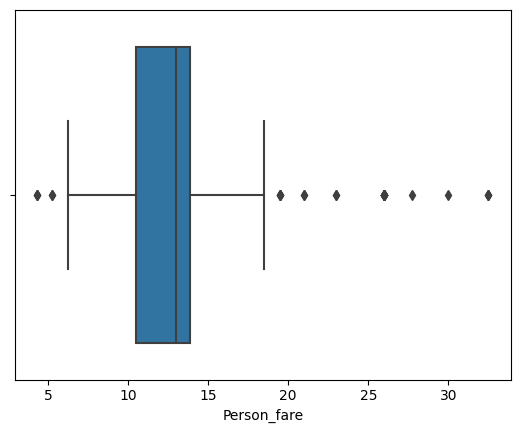

In [57]:
get_boxplot(df[df['Pclass']==2], columns=['Person_fare'])

In [58]:
df.loc[(df['Pclass']==2) & ((df['Person_fare']<=5) |(df['Person_fare']>=26))] 
df.drop(index=[53, 133, 236, 277, 312, 361, 413, 416, 426, 432, 466, 518, 551, 580, 594, 615, 728, 754], inplace=True) # отобрала вручную из диапазона выше

In [59]:
df[df['Pclass']==2].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Group,Person_fare
count,166.000000,166.000000,166.0,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,446.825301,0.469880,2.0,29.811244,0.361446,0.379518,20.244704,1.650602,12.500828
std,257.064288,0.500602,0.0,14.147645,0.604595,0.692341,12.561786,0.920260,2.980330
min,10.000000,0.000000,2.0,0.670000,0.000000,0.000000,10.500000,1.000000,5.250000
25%,227.500000,0.000000,2.0,23.000000,0.000000,0.000000,13.000000,1.000000,10.500000
50%,439.000000,0.000000,2.0,29.500000,0.000000,0.000000,13.500000,1.000000,13.000000
75%,673.750000,1.000000,2.0,36.785361,1.000000,1.000000,26.000000,2.000000,13.000000
max,887.000000,1.000000,2.0,70.000000,3.000000,3.000000,73.500000,5.000000,23.000000


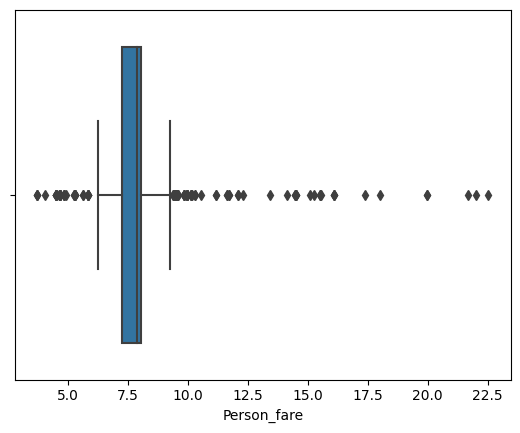

In [60]:
get_boxplot(df[df['Pclass']==3], columns=['Person_fare'])

In [61]:
df.loc[(df['Pclass']==3) & ((df['Person_fare']<=1) |(df['Person_fare']>=15))] 
df.drop(index=[18, 46, 48, 160, 184, 255, 347, 451, 490, 497, 508, 559, 605, 718, 743], inplace=True) # отобрала вручную и диапазона выше

In [62]:
df[df['Pclass']==3].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Group,Person_fare
count,476.000000,476.000000,476.0,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,441.136555,0.241597,3.0,24.613028,0.613445,0.394958,13.613733,1.815126,7.847894
std,265.061042,0.428501,0.0,11.044388,1.392366,0.894130,11.876171,1.632390,1.455253
min,1.000000,0.000000,3.0,0.420000,0.000000,0.000000,4.012500,1.000000,3.711100
25%,201.750000,0.000000,3.0,19.000000,0.000000,0.000000,7.750000,1.000000,7.250000
50%,431.000000,0.000000,3.0,25.000000,0.000000,0.000000,8.050000,1.000000,7.854200
75%,670.750000,0.000000,3.0,29.000000,1.000000,0.000000,14.686450,2.000000,8.050000
max,891.000000,1.000000,3.0,74.000000,8.000000,6.000000,69.550000,7.000000,14.500000


In [63]:
df.drop(columns=[ 'Name',  'Ticket',   'Group'],inplace=True) # Эти колонки уже не нужны, мы их использовали

In [64]:
df.isna().sum() # пропуски заполнены

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
cat            0
Deck           0
Person_fare    0
dtype: int64

## 7. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. 

In [65]:
selected = ['Sex','Pclass',"SibSp", "Parch", "Embarked", 'cat', "Deck"]
selectedColumns = df[selected]

In [66]:
encoded_features = pd.get_dummies(selectedColumns, columns=selected,drop_first=True)
encoded_features.head()

,Sex_male,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,...,cat_Mr.,cat_Mrs.,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_other
0,1,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


## 8.*Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

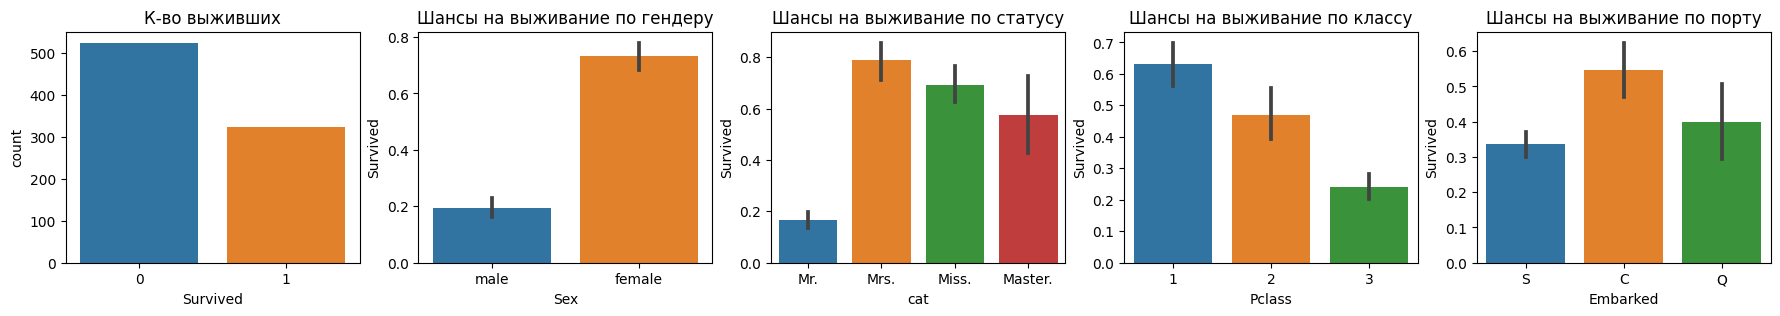

In [67]:
# Посмотрим на соотношение меток классов в Survived и оценим шансы на выживание у мужчин/женщин и у пассажиров разных классов
f, ax = plt.subplots(nrows=1, ncols=5, figsize=(22,3))

_ = sns.countplot(x='Survived', data=df, ax=ax[0])
ax[0].set_title('К-во выживших')
_ = sns.barplot(x='Sex', y='Survived', data=df, ax=ax[1])
ax[1].set_title('Шансы на выживание по гендеру')
_ = sns.barplot(x='cat', y='Survived', data=df, ax=ax[2])
ax[2].set_title('Шансы на выживание по статусу')
_ = sns.barplot(x='Pclass',y='Survived',data=df, ax=ax[3])
ax[3].set_title('Шансы на выживание по классу')
_ = sns.barplot(x='Embarked',y='Survived',data=df, ax=ax[4])
ax[4].set_title('Шансы на выживание по порту')

plt.show()
plt.close()

Все как и предполагалось - шансы на выживание у женщин  значительно выше чем у мужчин, а у пассажиров 1 класса - выше, чем у 2 и 3. И да, метки в целевом классе не сбалансированы

In [68]:
print(f"Распределение по классам: 1 = {df[df['Pclass']== 1].shape[0] / df.shape[0] * 100}, 2= {df[df['Pclass']== 1].shape[0] / df.shape[0] * 100}, 3= {df[df['Pclass']==3].shape[0] / df.shape[0] * 100}")
print(f"Шансы по по классам: 1 = {df[df['Pclass']==1]['Survived'].sum() / df[df['Pclass']==1].shape[0] * 100}, 2 = {df[df['Pclass']==2]['Survived'].sum() / df[df['Pclass']==2].shape[0] * 100}, 3= {df[df['Pclass']==3]['Survived'].sum() / df[df['Pclass']==3].shape[0] * 100}")

Распределение по классам: 1 = 24.29245283018868, 2= 24.29245283018868, 3= 56.132075471698116
Шансы по по классам: 1 = 63.10679611650486, 2 = 46.98795180722892, 3= 24.159663865546218


Посмотрим на распределение выживших по портам и соотнесем с распределением пассажиров по портам отправления

In [69]:
print(f"Распределение по портам: S = {df[df['Embarked']=='S'].shape[0] / df.shape[0] * 100}, C= {df[df['Embarked']=='C'].shape[0] / df.shape[0] * 100}, Q= {df[df['Embarked']=='Q'].shape[0] / df.shape[0] * 100}")
print(f"Шансы по портам: S = {df[df['Embarked']=='S']['Survived'].sum() / df[df['Embarked']=='S'].shape[0] * 100}, C= {df[df['Embarked']=='C']['Survived'].sum() / df[df['Embarked']=='C'].shape[0] * 100}, Q= {df[df['Embarked']=='Q']['Survived'].sum() / df[df['Embarked']=='Q'].shape[0] * 100}")

Распределение по портам: S = 72.64150943396226, C= 18.514150943396228, Q= 8.84433962264151
Шансы по портам: S = 33.603896103896105, C= 54.77707006369427, Q= 40.0


Получается, что выше всех шансы на выживание у пассажиров, отплывших из C. Выполним кодирование Embarked_chance

In [70]:
# Теперь оценим шансы на выживание по возрастным группам.

df['AgeBins'] = pd.cut(df.Age,bins=10,include_lowest=True) #  для этого разделим все возраста на 10 групп и для каждого возраста добавим интервал
survived_by_agebins = df[['AgeBins', 'Survived']].groupby(['AgeBins']).mean().sort_values(by='Survived', ascending=False) # найдем среднее значение Survived в каждом интервале - это и будет доля выживших возрастной группы
survived_by_agebins

,Survived
AgeBins,
"(0.339, 8.378]",0.648148
"(72.042, 80.0]",0.500000
"(32.252, 40.21]",0.472441
"(48.168, 56.126]",0.454545
"(8.378, 16.336]",0.431034
"(16.336, 24.294]",0.426471
"(56.126, 64.084]",0.375000
"(40.21, 48.168]",0.271605
"(24.294, 32.252]",0.261224


<Axes: xlabel='AgeBins'>

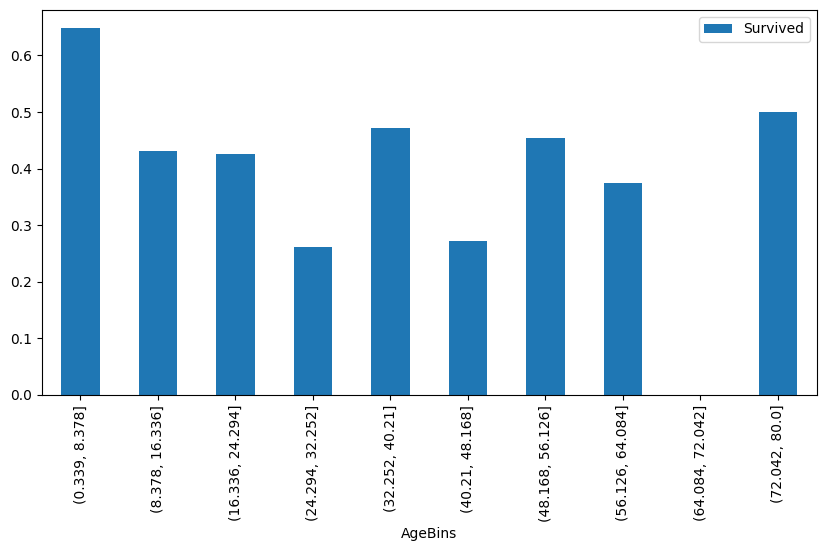

In [71]:
# построим гистограмму  возрастов выживших
survived_by_agebins.sort_index(ascending=True).plot(kind='bar',figsize=(10,5))

Видно, что и по возрастным группам шансы на выживание разные. САмые высокие - у детей и очень пожилых. Самые низкие - у молодежи и людей среднего возраста

In [72]:
survived_by_agebins_sex = \
    df[['AgeBins', 'Sex', 'Survived']].groupby(['AgeBins','Sex']).mean().sort_values(by='Survived', ascending=False)
survived_by_agebins_sex

,,Survived
AgeBins,Sex,
"(48.168, 56.126]",female,0.933333
"(32.252, 40.21]",female,0.897959
"(56.126, 64.084]",female,0.875000
"(16.336, 24.294]",female,0.769231
"(0.339, 8.378]",female,0.720000
"(24.294, 32.252]",female,0.600000
"(40.21, 48.168]",female,0.590909
"(0.339, 8.378]",male,0.586207
"(8.378, 16.336]",female,0.566667


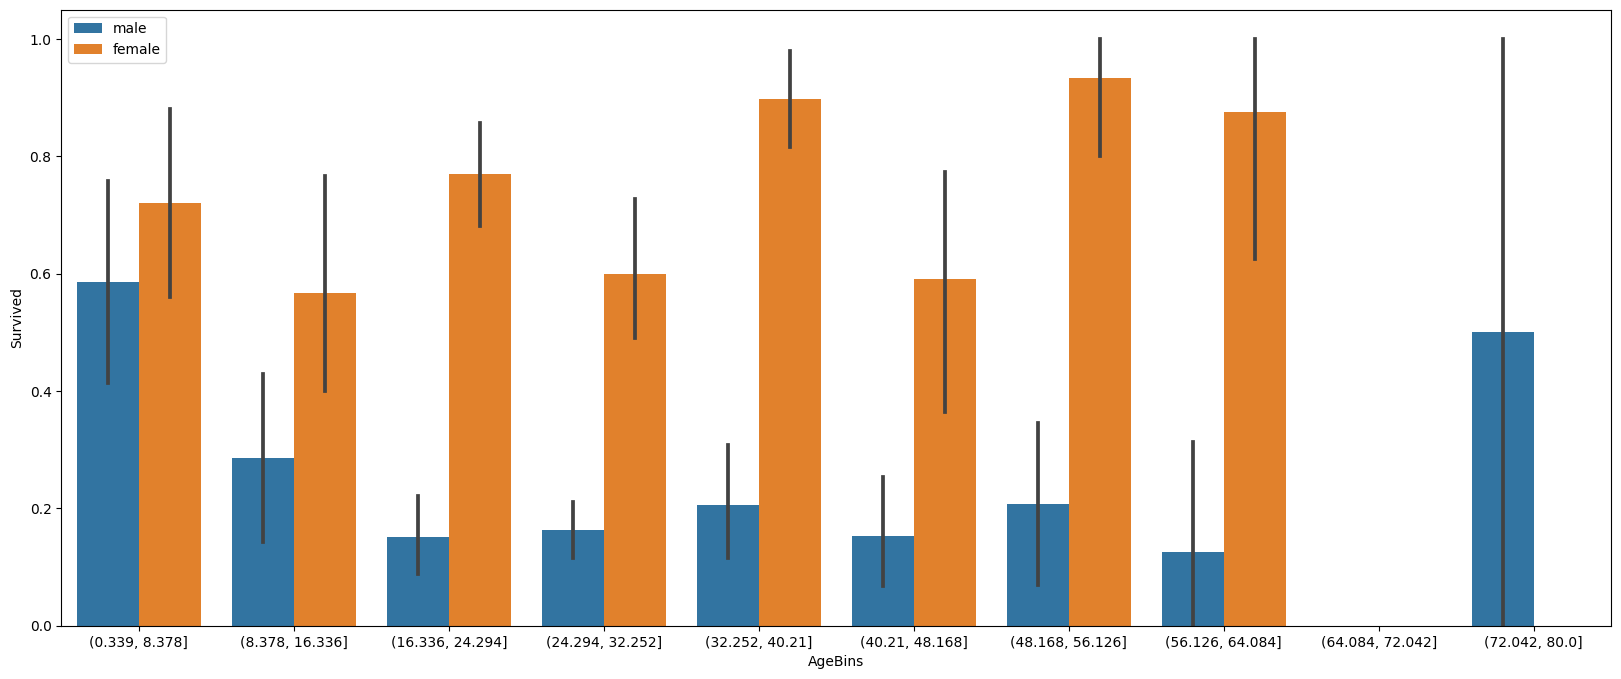

In [73]:
f, ax = plt.subplots(figsize=(20,8))
_ = sns.barplot(x='AgeBins',y='Survived', hue='Sex', data=df,ax=ax)
plt.legend(loc='best')
plt.show()


Что интересно: У детей различие между числом выживших мальчиков-девочек не настолько велико, как в остальных подгруппах ( потому, что детей спасали без учета их пола). А вот в возрастной группе 72-80 - одни мужчины. Почему?

Потому что в записи 851 датасета - ошибка. Возраст этого пассажира составлял 14 лет и 1 месяц. В записи 630 - тоже ошибка, возраст пассажира составил 47 лет

In [75]:
df.loc[630,  'Age']=14.1 # Все перресчитано и графики перестроены уже с учетом исправлений
df.loc[851, 'Age']=47

In [76]:
# Теперь оценим шансы на выживание по возрастным группам.

df['AgeBins'] = pd.cut(df.Age,bins=10,include_lowest=True) #  для этого разделим все возраста на 10 групп и для каждого возраста добавим интервал
survived_by_agebins = df[['AgeBins', 'Survived']].groupby(['AgeBins']).mean().sort_values(by='Survived', ascending=False) # найдем среднее значение Survived в каждом интервале - это и будет доля выживших возрастной группы
survived_by_agebins

,Survived
AgeBins,
"(0.348, 7.478]",0.660000
"(7.478, 14.536]",0.461538
"(35.71, 42.768]",0.454545
"(28.652, 35.71]",0.449612
"(14.536, 21.594]",0.424051
"(49.826, 56.884]",0.421053
"(56.884, 63.942]",0.409091
"(42.768, 49.826]",0.279412
"(21.594, 28.652]",0.247863


<Axes: xlabel='AgeBins'>

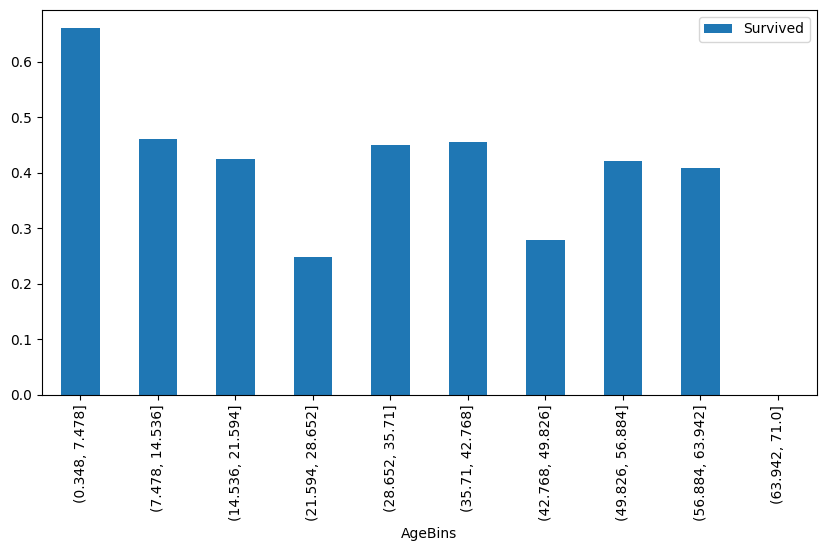

In [77]:
# построим гистограмму  возрастов выживших
survived_by_agebins.sort_index(ascending=True).plot(kind='bar',figsize=(10,5))

Видно, что и по возрастным группам шансы на выживание разные. САмые высокие - у детей и очень пожилых. Самые низкие - у молодежи и людей среднего возраста

In [78]:
survived_by_agebins_sex = \
    df[['AgeBins', 'Sex', 'Survived']].groupby(['AgeBins','Sex']).mean().sort_values(by='Survived', ascending=False)
survived_by_agebins_sex

,,Survived
AgeBins,Sex,
"(49.826, 56.884]",female,0.923077
"(56.884, 63.942]",female,0.875000
"(28.652, 35.71]",female,0.844444
"(35.71, 42.768]",female,0.810811
"(14.536, 21.594]",female,0.742857
"(0.348, 7.478]",female,0.739130
"(21.594, 28.652]",female,0.666667
"(42.768, 49.826]",female,0.611111
"(0.348, 7.478]",male,0.592593


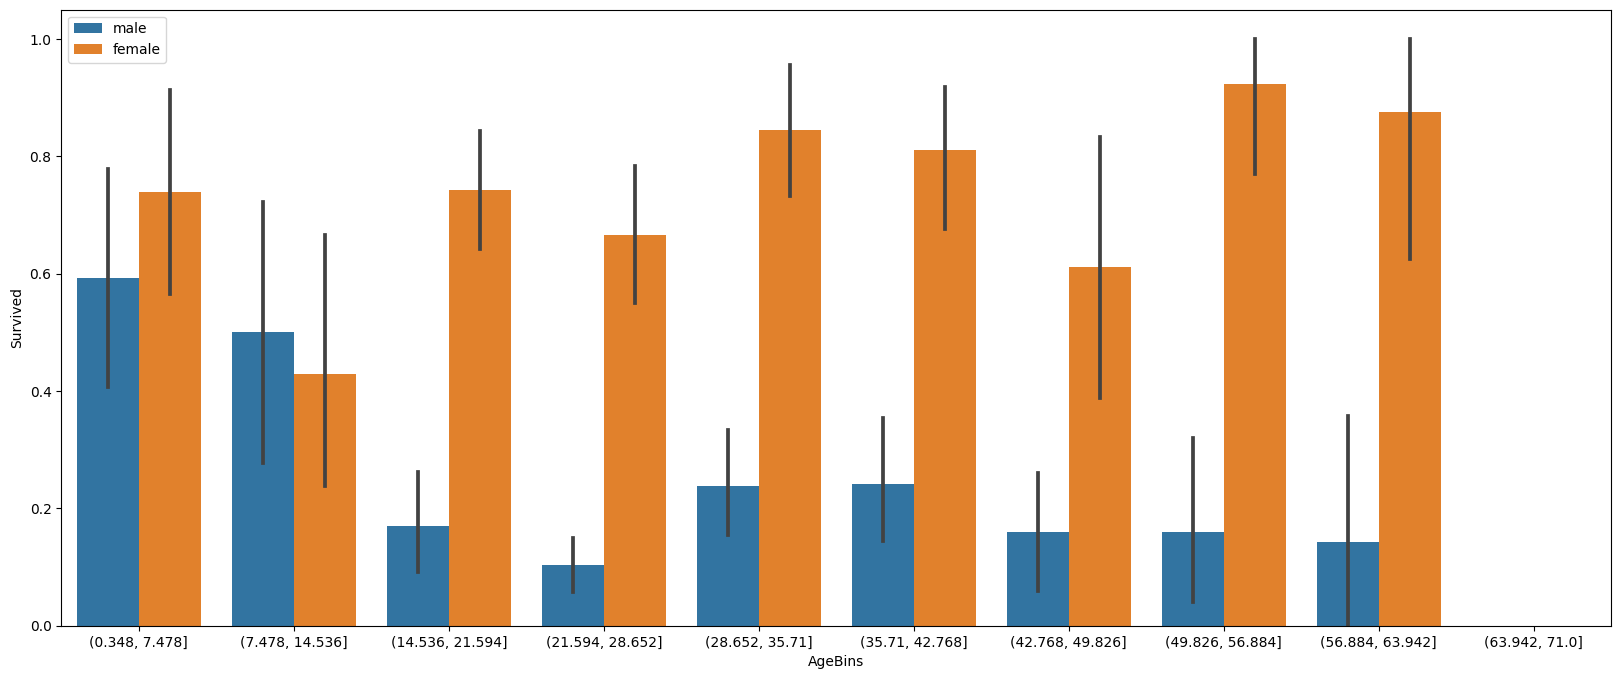

In [79]:
f, ax = plt.subplots(figsize=(20,8))
_ = sns.barplot(x='AgeBins',y='Survived', hue='Sex', data=df,ax=ax)
plt.legend(loc='best')
plt.show()


Вот теперь похоже на правду

##9. *Попробуйте математически преобразовать признак Age.

Пеобразование Age выполним следующим образом. Построим гистограмму возрастов и заменим возраст на значение бинов

In [82]:
result=survived_by_agebins.reset_index().to_numpy()

In [83]:
# Age_percent - доля выживших в данной возрастной группе
def prop_saved_by_age(x):

  for i, item in enumerate(result):
    if x in item[0]:
      return item[1]


In [84]:
df['Age_percent']=df['Age'].apply(prop_saved_by_age)

In [87]:
# Age_median - медианы
def Age_median(x):
  for i, item in enumerate(result):
    if x in item[0]:
      return item[0].mid

In [88]:
df['Age_median']=df['Age'].apply(Age_median)

In [89]:
# Age_number - порядковый номер категории
def Age_number(x):
  for i, item in enumerate(result):
    if x in item[0]:
      return str(i)

In [90]:
df['Ahe_number']=df['Age'].apply(Age_number)

In [91]:
df.drop(columns=['Pclass', 'Sex', 'SibSp','Parch',    'Fare', 'Embarked' , 'AgeBins', 'cat', 'Deck', 'PassengerId'],inplace=True)

In [94]:
df.head()

,Survived,Age,Person_fare,Age_percent,Age_median,Ahe_number
0,0,22.0,7.2500,0.247863,25.123,8
1,1,38.0,71.2833,0.454545,39.239,2
2,1,26.0,7.9250,0.247863,25.123,8
3,1,35.0,26.5500,0.449612,32.181,3
4,0,35.0,8.0500,0.449612,32.181,3


a) Модель без кодирования Age

## 10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [95]:
from sklearn.metrics import classification_report

In [96]:
other_features=df.loc[:, ['Person_fare', 'Age' ]]
X = pd.concat([other_features, encoded_features], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, multi_class='multinomial',
                                        class_weight={0: pd.DataFrame(y_train).value_counts(normalize=True)[0],
                                                      1: pd.DataFrame(y_train).value_counts(normalize=True)[1]})
)
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)
print(f'accuracy={lr.score(X_test, y_test)}, precision={precision_score(y_test, predictions)}, recall={recall_score(y_test, predictions)}, balanced_accuracy_score = {balanced_accuracy_score(y_test, predictions)}')
print(classification_report(y_test, predictions,target_names=['0','1']))

accuracy=0.8352941176470589, precision=0.8363636363636363, recall=0.7076923076923077, balanced_accuracy_score = 0.810989010989011
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       105
           1       0.84      0.71      0.77        65

    accuracy                           0.84       170
   macro avg       0.84      0.81      0.82       170
weighted avg       0.84      0.84      0.83       170



b) Модель с заменой Age на медиану для каждого из возрастных диапазонов

In [97]:
other_features=df.loc[:, ['Person_fare', 'Age_median']]
X = pd.concat([other_features, encoded_features], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, multi_class='multinomial',
                                        class_weight={0: pd.DataFrame(y_train).value_counts(normalize=True)[0],
                                                      1: pd.DataFrame(y_train).value_counts(normalize=True)[1]})
)
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)
print(f'accuracy={lr.score(X_test, y_test)}, precision={precision_score(y_test, predictions)}, recall={recall_score(y_test, predictions)}, balanced_accuracy_score = {balanced_accuracy_score(y_test, predictions)}')
print(classification_report(y_test, predictions, target_names=['0','1']))

accuracy=0.8411764705882353, precision=0.8518518518518519, recall=0.7076923076923077, balanced_accuracy_score = 0.8157509157509157
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       105
           1       0.85      0.71      0.77        65

    accuracy                           0.84       170
   macro avg       0.84      0.82      0.83       170
weighted avg       0.84      0.84      0.84       170



c) Модель с заменой Age на долю выживших


In [98]:
other_features=df.loc[:, ['Person_fare', 'Age_percent']]
X = pd.concat([other_features, encoded_features], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, multi_class='multinomial',
                                        class_weight={0: pd.DataFrame(y_train).value_counts(normalize=True)[0],
                                                      1: pd.DataFrame(y_train).value_counts(normalize=True)[1]})
)
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)
print(f'accuracy={lr.score(X_test, y_test)}, precision={precision_score(y_test, predictions)}, recall={recall_score(y_test, predictions)}, balanced_accuracy_score = {balanced_accuracy_score(y_test, predictions)}')
print(classification_report(y_test, predictions, target_names=['0','1']))

accuracy=0.8294117647058824, precision=0.8461538461538461, recall=0.676923076923077, balanced_accuracy_score = 0.8003663003663004
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       105
           1       0.85      0.68      0.75        65

    accuracy                           0.83       170
   macro avg       0.83      0.80      0.81       170
weighted avg       0.83      0.83      0.82       170



d) Модель с заменой Age на номер возрастного диапазона с последующим OneHot кодированием

In [99]:
other_features=df.loc[:, ['Person_fare']]
other_features_encoded = pd.get_dummies(df['Ahe_number'], columns=['Ahe_number'],drop_first=True)
X = pd.concat([other_features, other_features_encoded, encoded_features], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)
print(f'accuracy={lr.score(X_test, y_test)}, precision={precision_score(y_test, predictions)}, recall={recall_score(y_test, predictions)}, balanced_accuracy_score = {balanced_accuracy_score(y_test, predictions)}')
print(classification_report(y_test, predictions, target_names=['0','1']))


accuracy=0.8058823529411765, precision=0.7580645161290323, recall=0.7230769230769231, balanced_accuracy_score = 0.7901098901098901
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.76      0.72      0.74        65

    accuracy                           0.81       170
   macro avg       0.80      0.79      0.79       170
weighted avg       0.80      0.81      0.80       170



## 11. Сформулируйте выводы по проделанной работе.


a) Кратко опишите какие преобразования были сделаны и почему.

Были выполнены следующие преобразования:


1.   Заполнены пропуски в признаках Embarked
2.   Создан вспомогательный новый признак Group (к-во билетов с одинаковым номером) для более точного расчета Person_fare
3.   Создан новый признак cat, отражающий соц. статус(Mr, Mrs, Miss, Master) и позволяющий более точно заполнить пропуски в Age
4.   Заполнены пропуски в Age с учетом cat и Pclass несколькими способами ( медианой страт, с помощью модели Линейной регрессии
5.   Создан новый признак Person_fare на основе Fare и Group
6.   Удалены выбросы из Fare, скорректированы ошибки в датасете с учетом данных энциклопедии Титаник
7.   Cкорректированы ошибки в Age с учетом данных энциклопедии Титаник
8.   Выполнено кодирование категориальных признаков 'sex', 'Pclass',"SibSp", "Parch", "Embarked", "cat" с использованием OneHotEncoder(pd.get_dummies())
9.   Проведено исследование влияния предобработки Age на метрики качества. Были рассмотрены 3 варианта:
  a и е) отсутствие обработки ( 2 разных варианта заполнения)
  b) разбиение на возрастные диапазоны и замена значений на медианы диапазонов
  с) разбиение на возрастные диапазоны и замена значений на процент выживших в каждом возрастном диапазоне
  d) разбиение на возрастные диапазоны, кодирование по приниципу OrdinalEncoder, в порядке возрастания процент выживших, и последующее перекодирование OneHotEncoder



b) Сравните метрики моделей из п. 2 и п. 10.

В 1 модели получены следующие метрики: *accuracy=0.6853146853146853, precision=0.6938775510204082, recall=0.53125, balanced_accuracy_score = 0.6706882911392404*


Во 2 модели:
в варианте a : *0.8352941176470589, precision=0.8363636363636363, recall=0.7076923076923077, balanced_accuracy_score = 0.810989010989011*

 в варианте b получены следующие метрики: *accuracy=0.8411764705882353, precision=0.8518518518518519, recall=0.7076923076923077, balanced_accuracy_score = 0.8157509157509157* (улучшились метрики accuracy, precision, balanced_accuracy_score, recall не изменилась)

в варианте c получены следующие метрики: *accuracy=0.8294117647058824, precision=0.8461538461538461, recall=0.676923076923077, balanced_accuracy_score = 0.8003663003663004*(по сравнению с  a) незначительно ухудшились accuracy, recall,balanced_accuracy_score, выросла precision)

в варианте d получены метрики: *accuracy=0.8058823529411765, precision=0.7580645161290323, recall=0.7230769230769231, balanced_accuracy_score = 0.7901098901098901* (ухудшение accuracy, precision,balanced_accuracy_score, улучшение recall по сравнению с a)

В целом. колебания метрик незначительные, лучшие результаты показал выриант b ( замена возраста на медиану соответсвующего овзрастного диапазона


c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. 

Рост метрик качества модели говорит о том, что при построении моделей необходимо предварительно обрабатываить данные, заполнять пропуски, вводить новые признаки, производить масштабирование числовых и кодирование категориальных признаков.
В то же время, исправление ошибок ( приведение в соответствие с данными энциклопедии) не сильно повлияло на результат ( более того, метрики ухудшились, хотя было проведено исправление данных в соответствии с источником). 

В действительно больших данных нет смысла, да и возможности, этим заниматься. Главное - удаление дубликатов, заполнение пропусков, масштабирование, кодирование категориальных признаков, создание новых и удаление ненужных.

